0.00017415967203818499


Text(0,0.5,'Infected Incidence')

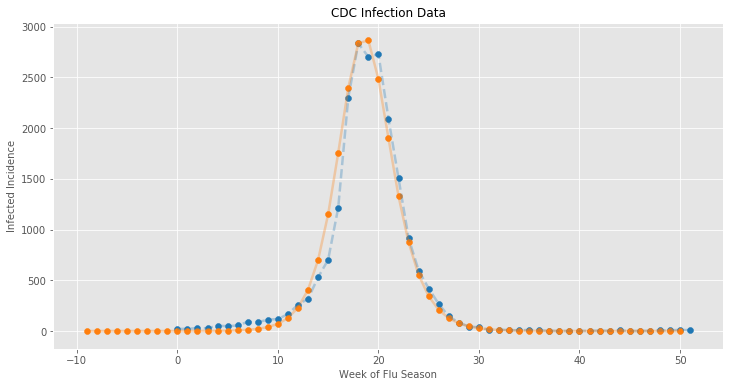

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
%matplotlib inline

virusLibrary = [('B', 1.24), ('A (H1)', 1.27), ('A (H3)', 1.25), ('A (Subtyping not Performed)', 1.26)]
virusSet = [virusLibrary[3]]
groundTruthSet = [virusLibrary[3][0]]

def weekTransform(row):
    if (row["WEEK"] >= 40):
        week = row["WEEK"] - 40
    else:
        week = row["WEEK"] + 12
    return(week)

df = pd.read_csv('WHO_NREVSS_Combined_2007_2008.csv', header=1)

df["idx: t"] = df.apply(weekTransform, axis=1)

X = df['idx: t']

G = []
for groundTruth in groundTruthSet:
    G.append(df[groundTruth])
Y = [sum(y) for y in zip(*G)]

plt.style.use('ggplot')
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
    (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
    (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
N = 310000000
I0 = 1
R0 = 0
S0 = N - R0 - I0

gamma = 1.0/3.0
rho = [x[1] for x in virusSet]
beta = [x*gamma for x in rho]

dy = []

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = dy[0](y, t, N, beta, gamma)
    dIdt = dy[1](y, t, N, beta, gamma)
    dRdt = dy[2](y, t, N, beta, gamma)
    return dSdt, dIdt, dRdt

dy.append(lambda y, t, N, beta, gamma: -beta * y[0] * y[1] / N)
dy.append(lambda y, t, N, beta, gamma: beta * y[0] * y[1] / N - gamma * y[1])
dy.append(lambda y, t, N, beta, gamma: gamma * y[1])
y0 = S0, I0, R0

minT = -10
maxT = 51
t = list(range(minT*7, maxT*7))
w = range(minT+1, maxT)

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

incidence_predicted = -np.diff(S[0:len(S)-1:7])
incidence_observed = df[groundTruth]
fraction_confirmed = incidence_observed.sum()/incidence_predicted.sum()
print(fraction_confirmed)

plt.figure(figsize=(12,6))
plt.plot(X, Y, ls="--", lw=2.5, color=tableau20[0], alpha=0.3)
plt.scatter(X, Y, color=tableau20[0])
#plt.text(40, 100, "CDC Data for Influenza B", fontsize=12, color=tableau20[0])
plt.plot(w, incidence_predicted*fraction_confirmed, lw=2.5, color=tableau20[2], alpha=0.3)
plt.scatter(w, incidence_predicted*fraction_confirmed, color=tableau20[2])
plt.title("CDC Infection Data", fontsize=12)
plt.xlabel("Week of Flu Season", fontsize=10)
plt.ylabel("Infected Incidence", fontsize=10)

In [71]:
df

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,idx: t
0,National,X,2007,40,2382,1.847190,0,17,2,20,0,5,0,0
1,National,X,2007,41,2534,1.736390,0,19,3,22,0,0,0,1
2,National,X,2007,42,2953,1.625470,0,16,2,28,0,2,0,2
3,National,X,2007,43,3179,1.572820,0,16,2,27,0,5,0,3
4,National,X,2007,44,3575,2.069930,0,10,0,53,0,11,0,4
5,National,X,2007,45,3797,2.238610,0,17,10,47,0,11,0,5
6,National,X,2007,46,4131,2.106030,0,24,6,55,0,2,0,6
7,National,X,2007,47,4040,3.465350,0,35,2,90,0,13,0,7
8,National,X,2007,48,4855,3.316170,0,49,12,86,0,14,0,8
9,National,X,2007,49,4909,3.666730,0,35,10,113,0,22,0,9


Text(0,0.5,'Infected Incidence')

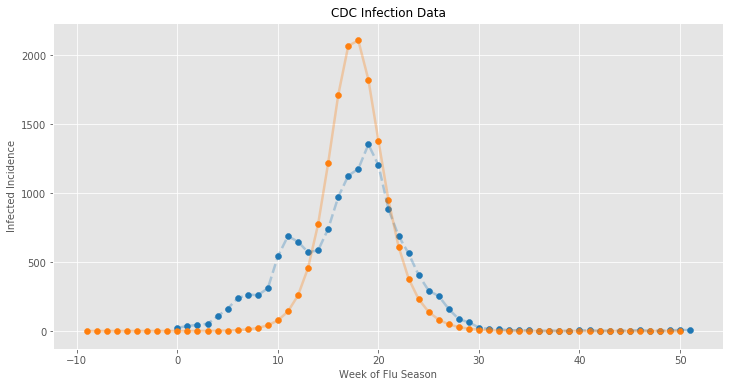

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
%matplotlib inline

virusLibrary = [('B', 1.24), ('A (H1)', 1.27), ('A (H3)', 1.25), ('A (Subtyping not Performed)', 1.26)]
virus = virusLibrary[1]
groundTruth = virusLibrary[0][0]

def weekTransform(row):
    if (row["WEEK"] >= 40):
        week = row["WEEK"] - 40
    else:
        week = row["WEEK"] + 12
    return(week)

df = pd.read_csv('WHO_NREVSS_Combined_2010_2011.csv', header=1)

df["idx: t"] = df.apply(weekTransform, axis=1)

X = df['idx: t']
Y = df[groundTruth]

plt.style.use('ggplot')
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
    (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
    (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
N = 310000000
I0 = 1
R0 = 0
S0 = N - R0 - I0

gamma = 1.0/3.0
rho = virus[1]
beta = rho*gamma

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0

minT = -10
maxT = 51
t = list(range(minT*7, maxT*7))
w = range(minT+1, maxT)

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

incidence_predicted = -np.diff(S[0:len(S)-1:7])
incidence_observed = df[groundTruth]
fraction_confirmed = incidence_observed.sum()/incidence_predicted.sum()

plt.figure(figsize=(12,6))
plt.plot(X, Y, ls="--", lw=2.5, color=tableau20[0], alpha=0.3)
plt.scatter(X, Y, color=tableau20[0])
#plt.text(40, 100, "CDC Data for Influenza B", fontsize=12, color=tableau20[0])
plt.plot(w, incidence_predicted*fraction_confirmed, lw=2.5, color=tableau20[2], alpha=0.3)
plt.scatter(w, incidence_predicted*fraction_confirmed, color=tableau20[2])
plt.title("CDC Infection Data", fontsize=12)
plt.xlabel("Week of Flu Season", fontsize=10)
plt.ylabel("Infected Incidence", fontsize=10)

In [57]:
df

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,idx: t
0,National,X,2010,40,3600,2.138890,7,0,18,29,0,23,0,0
1,National,X,2010,41,4006,3.195210,13,0,36,43,0,36,0,1
2,National,X,2010,42,4112,3.380350,8,0,35,51,0,45,0,2
3,National,X,2010,43,4240,3.915090,13,0,56,45,0,52,0,3
4,National,X,2010,44,4608,5.360240,12,0,61,68,0,106,0,4
5,National,X,2010,45,5377,6.509210,15,0,79,93,0,163,0,5
6,National,X,2010,46,5578,8.730730,23,0,123,104,0,237,0,6
7,National,X,2010,47,5533,10.609100,11,0,155,156,0,265,0,7
8,National,X,2010,48,5975,9.991630,35,0,176,126,0,260,0,8
9,National,X,2010,49,6361,13.252600,48,0,359,126,0,310,0,9
